<div align="center">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/5_algoritmes_no_supervisats.ipynb)

Si no funciona el botó podeu copiar el següent [enllaç](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/5_algoritmes_no_supervisats.ipynb)

</div>

# Unitat 5: Algoritmes no supervisats: Agrupament / Clustering

L'agrupament (*clustering*) és una tècnica que ens permet trobar grups d'objectes similars que estan més relacionats entre si que amb objectes d'altres grups. Entre els exemples d'aplicacions d'agrupació en clústers s'inclouen l'agrupació de documents, música i pel·lícules per diferents temes, o la cerca de clients que comparteixin interessos similars en funció de comportaments de compra comuns com a base per als motors de recomanació.

Existeixen múltiples algorismes de clustering, en aquesta [llibreria](https://scikit-learn.org/stable/modules/clustering.html#clustering) podeu trobar la majoria d'ells implementats. Aquests algoritmes consideren diversos criteris com la distància entre punts, la densitat, distància en grafs, etc.

Introduïm dos algorismes bàsics:

- K-Means
- Spectral Clustering

## K-Means

L'algoritme **K-means** redueix la dimensionalitat de les mostres mitjançant el càlcul de centroides, que són punts representatius de cada *clúster*. És un mètode paramètric pel qual s'estableix el nombre de clústers (grups) segons el paràmetre **K**, que ha de ser definit prèviament per l'usuari. El seu comportament es pot visualitzar mitjançant una representació gràfica, la qual ajuda a entendre la distribució i la separació dels diferents clústers en l'espai multidimensional.

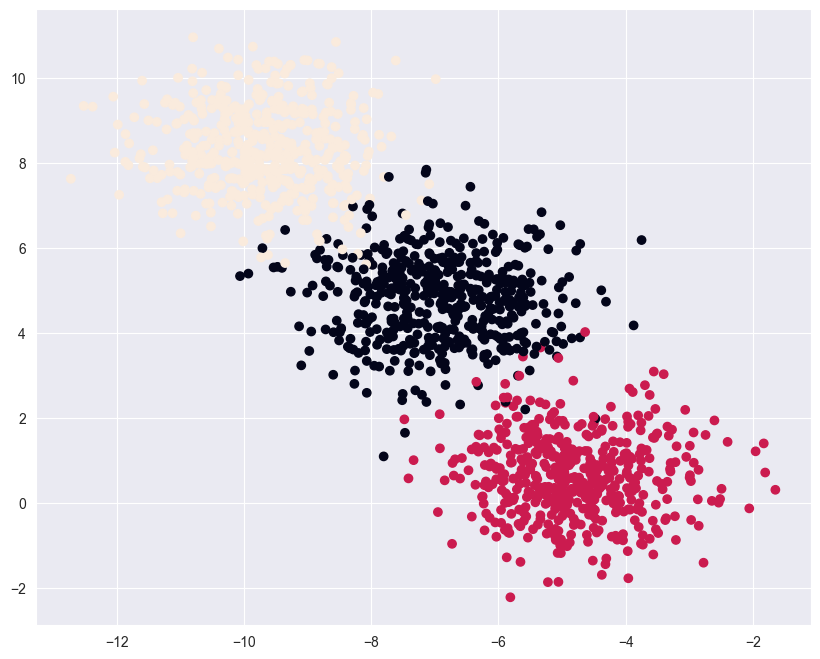

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 12

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

C:\Users\miquel\miniconda3\envs\ia2024\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\miquel\miniconda3\envs\ia2024\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


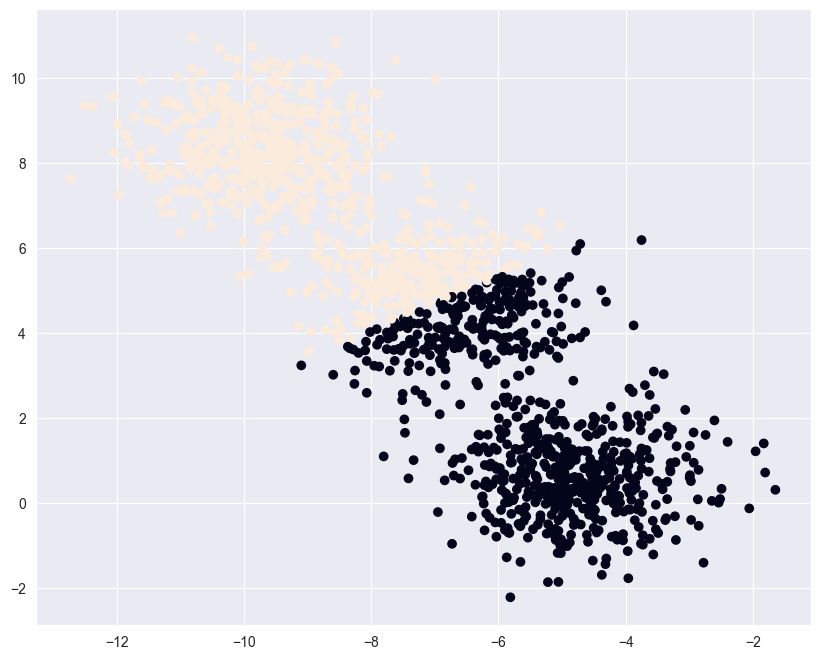

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=2023)
y_pred = model.fit_predict(X)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

En el gràfic anterior els dos colors representen els grups que s'han identificat mitjançant K-means. 

Cream un nou conjunt de dades. Aquesta vegada més superposats.

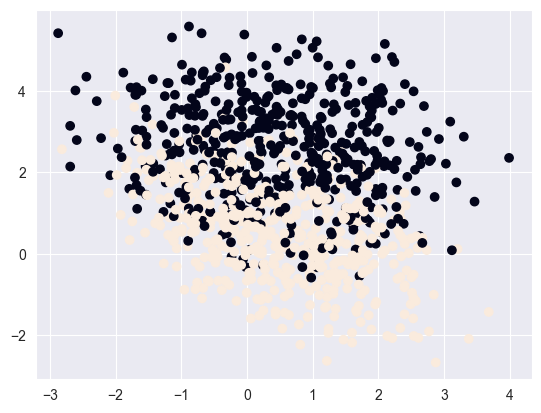

In [5]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=2023, n_clusters_per_class=1)
rng = np.random.RandomState(2023)
X += 3 * rng.uniform(size=X.shape)

plt.scatter(X[:,0],X[:,1],c=y)

I tornam a aplicar-hi l'algoritme ``k-means``.

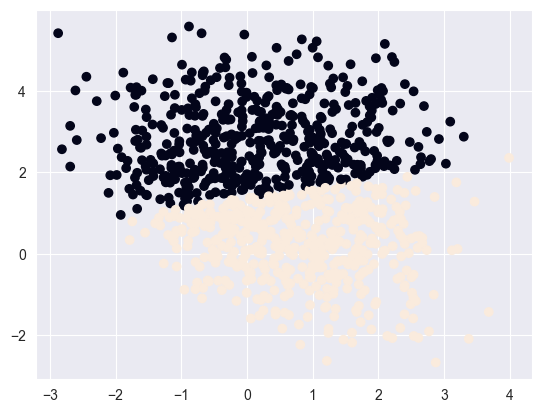

In [6]:
# I sobre les dades que hem Y sobre esos datos volvemos a aplicar nuestro k-Means
model = KMeans(n_clusters=2, random_state=2023)
y_pred = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

### Nombre adequat de grups

Un dels principals desafiaments de l'aprenentatge no supervisat és que no coneixem la resposta definitiva a una de les preguntes principals: **quants de grups hi ha?**. Ho podem dir d'una altra manera, no disposam d'etiquetes de classe en el nostre conjunt de dades. Per tant, per a quantificar la qualitat del clustering, necessitem utilitzar mètriques intrínseques, com la *SSE* dins de l'agrupació per a comparar el rendiment de diferents agrupacions.

$$ SSE = \sum_{i=1}^{n} \sum_{j=1}^{k} w^{(i,j)} ||x^{(i)} - \mu^{(j)} ||^2 $$

a on $\mu^{(j)}$ és el centroide del _cluster_ $j$,  i $w^{(i,j)} = 1$ si la mostra $x^{(i)}$ forma part del clúster $j$ i $w^{(i,j)} = 0$ en cas contrari.

Aquesta tècnica se la coneix com el mètode del colze o **elbow method**. En el següent codi mostram com es veuria gràficament el mètode del colze amb les dades que hem emprat anteriorment.  

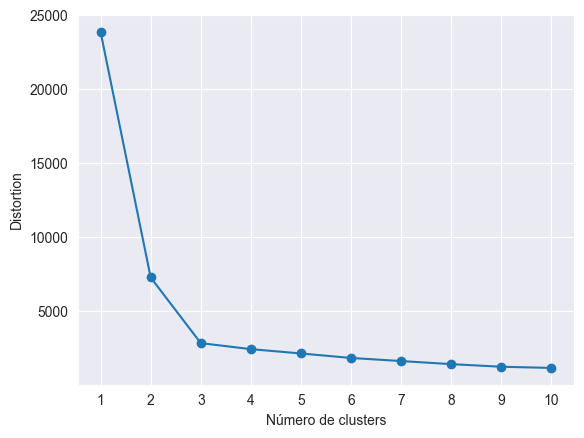

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 12
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distortion')
plt.xticks(range(1,11))
plt.show()

Del gràfic anterior podem observar que el millor nombre clústers és **3**. Podem veure el resultat tot seguit.



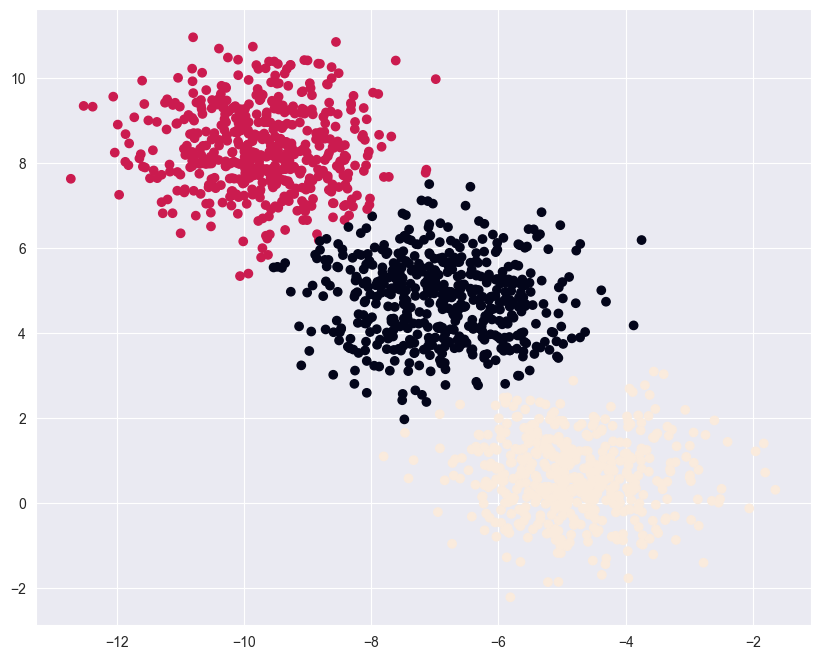

In [10]:
model = KMeans(n_clusters=3, random_state=2023)
y_pred = model.fit_predict(X)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## Spectral Clustering

La tècnica [*spectral clustering*](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
 és útil quan els grups no tenen una forma clara o convexa, és a dir, quan no tenen una forma compacta i regular com la d'un cercle o una el·lipse, que permetria definir fàcilment un centre. També és útil quan descriure els grups només amb el seu centre i dispersió no és suficient. Un exemple seria identificar grups amb formes més complexes, com cercles concèntrics en un pla 2D.


Aquest mètode té com a paràmetre més importants:
- El nombre de clusters, similar al paràmetre ``k`` de l'algoritme *k-means*.


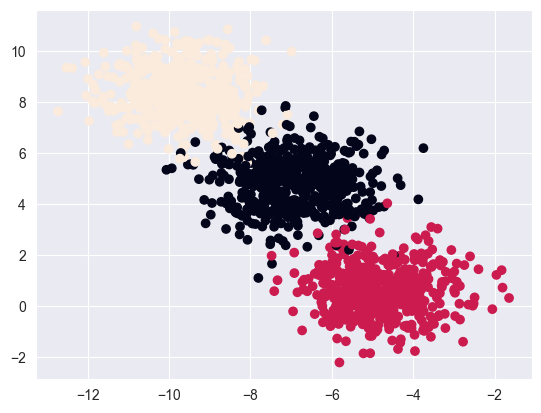

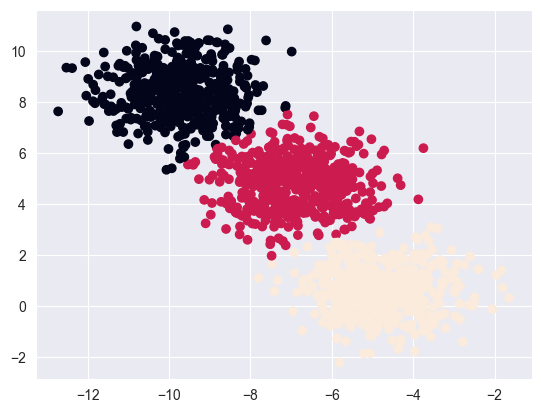

In [12]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 12

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

sc = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0)
y_pred = sc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## <span style="color:red">Activitats</span>

Realització un estudi entre K-Means i Spectral Clustering amb el següent dataset ([*data/Live.csv*](https://archive.ics.uci.edu/ml/datasets/facebook+Live+Sellers+*in+*Thailand)). 

- Càrrega, **selecciona** i prepara les dades.
- Quines agrupacions es realitzen sobre les dades? És a dir, proporciona una interpretació de cada una de les agrupacions. 
- Avalua la idoneïtat dels diferents grups identificats.


In [31]:
pathfile = "data/Live_20210128.csv"